In [13]:
import pandas as pd
import pickle


In [14]:

country = {}
a = open("airport.pkl", "rb")
country = pickle.load(a)
a.close()
continents = {}
a = open("countries_continents.pkl", "rb")
continents = pickle.load(a)
a.close()

In [15]:
BoardingPass = pd.read_csv('YourBoardingPassDotAero.csv', index_col='id')

In [16]:
BoardingPass = BoardingPass[['Name', 'FlightNumber', 'BoardNumber', 'From', 'FromCode', 'To', 'ToCode', 'Date', 'Time']]

In [17]:
BoardingPass

,Name,FlightNumber,BoardNumber,From,FromCode,To,ToCode,Date,Time
id,,,,,,,,,
0,AMELIIA SKVORTSOVA,SU1513,NaN,SURGUT,SGC,MOSCOW,SVO,2017-07-11,07:05
1,SAFONOVA KIRA,SU1513,SU 892213885,SURGUT,SGC,MOSCOW,SVO,2017-07-11,07:05
2,KARINA M SEREBRYAKOVA,SU1513,NaN,SURGUT,SGC,MOSCOW,SVO,2017-07-11,07:05
3,LUKIANOV IGOR,SU1513,NaN,SURGUT,SGC,MOSCOW,SVO,2017-07-11,07:05
4,VYACHESLAV ZHILIN,SU1314,FB 700812885,MOSCOW,SVO,MINERALNYE VODY,MRV,2017-07-11,21:35
...,...,...,...,...,...,...,...,...,...
615766,POPOVA IAROSLAVA,SU6453,NaN,SAINT PETERSBURG,LED,ORENBURG,REN,2017-04-15,00:30
615767,NEKRASOVA ELINA,AZ1421,NaN,ROME,FCO,TURIN,TRN,2017-04-15,08:35
615768,BORIS PLOTNIKOV,KL1534,NaN,AMSTERDAM,AMS,DURHAM,MME,2017-04-15,10:20


In [18]:
BoardingPass['fromCountry'] = [country.get(x,'') for x in BoardingPass['FromCode'].values]
BoardingPass['toCountry'] = [country.get(x,'') for x in BoardingPass['ToCode'].values]
BoardingPass['fromContinent'] = [continents.get(x, '') for x in BoardingPass['fromCountry'].values]
BoardingPass['toContinent'] = [continents.get(x, '') for x in BoardingPass['toCountry'].values]

In [21]:
BoardingPass = BoardingPass[['Name','Date','Time','fromContinent', 'toContinent']]
BoardingPass

,Name,Date,Time,fromContinent,toContinent
id,,,,,
0,AMELIIA SKVORTSOVA,2017-07-11,07:05,Europe/Asia,Europe/Asia
1,SAFONOVA KIRA,2017-07-11,07:05,Europe/Asia,Europe/Asia
2,KARINA M SEREBRYAKOVA,2017-07-11,07:05,Europe/Asia,Europe/Asia
3,LUKIANOV IGOR,2017-07-11,07:05,Europe/Asia,Europe/Asia
4,VYACHESLAV ZHILIN,2017-07-11,21:35,Europe/Asia,Europe/Asia
...,...,...,...,...,...
615766,POPOVA IAROSLAVA,2017-04-15,00:30,Europe/Asia,Europe/Asia
615767,NEKRASOVA ELINA,2017-04-15,08:35,Europe,Europe
615768,BORIS PLOTNIKOV,2017-04-15,10:20,Europe,North America


In [25]:
BoardingPass['longFlight'] = [int(BoardingPass['fromContinent'][x] != BoardingPass['toContinent'][x]) for x in range(615771)]

/tmp/ipykernel_31406/3717061154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BoardingPass['longFlight'] = [int(BoardingPass['fromContinent'][x] != BoardingPass['toContinent'][x]) for x in range(615771)]


In [26]:
BoardingPass

,Name,Date,Time,fromContinent,toContinent,longFlight
id,,,,,,
0,AMELIIA SKVORTSOVA,2017-07-11,07:05,Europe/Asia,Europe/Asia,0
1,SAFONOVA KIRA,2017-07-11,07:05,Europe/Asia,Europe/Asia,0
2,KARINA M SEREBRYAKOVA,2017-07-11,07:05,Europe/Asia,Europe/Asia,0
3,LUKIANOV IGOR,2017-07-11,07:05,Europe/Asia,Europe/Asia,0
4,VYACHESLAV ZHILIN,2017-07-11,21:35,Europe/Asia,Europe/Asia,0
...,...,...,...,...,...,...
615766,POPOVA IAROSLAVA,2017-04-15,00:30,Europe/Asia,Europe/Asia,0
615767,NEKRASOVA ELINA,2017-04-15,08:35,Europe,Europe,0
615768,BORIS PLOTNIKOV,2017-04-15,10:20,Europe,North America,1


In [42]:

long_flights_count = BoardingPass.groupby('Name')['longFlight'].sum().reset_index()
newTable = BoardingPass.groupby('Name').size().reset_index(name='FlightCount')
newTable['longFlight'] = long_flights_count['longFlight'] 
newTable = newTable[newTable['longFlight'] > 0]
newTable

,Name,FlightCount,longFlight
0,ABRAMOV AL'BERT,1,1
3,ABRAMOV ANATOLII,2,1
5,ABRAMOV ANATOLIY M,2,1
6,ABRAMOV ANTON,5,1
7,ABRAMOV ARTEM,13,3
...,...,...,...
229239,ZYKOVA VITALINA V,1,1
229241,ZYKOVA VLADA B,1,1
229243,ZYKOVA YULIYA G,3,3
229244,ZYKOVA ZARINA,9,2


Text(0, 0.5, 'Count')

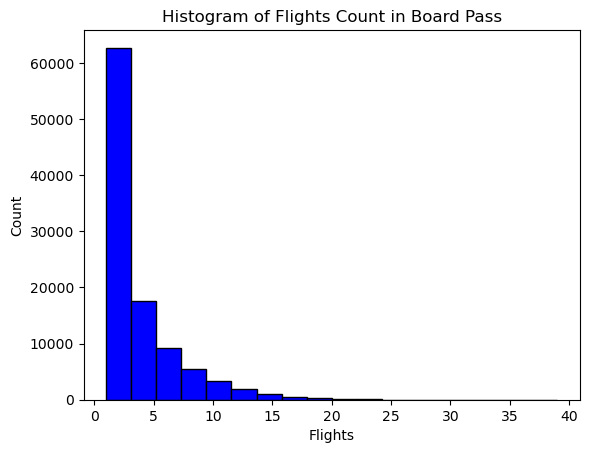

In [43]:
import matplotlib.pyplot as plt
plt.hist(newTable['FlightCount'], color = 'blue', edgecolor = 'black',bins = int(180/10))
plt.title('Histogram of Flights Count in Board Pass')
plt.xlabel('Flights')
plt.ylabel('Count')

In [36]:
newTable = newTable[newTable['FlightCount'] > 10]


In [45]:

df = BoardingPass

# Преобразовать столбцы 'Date' и 'Time' в datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Отфильтровать данные по longFlights == 1
df_long_flights = df[df['longFlight'] == 1]

# Группируем по имени и находим временные различия
result = df_long_flights.sort_values(by=['Name', 'Datetime']).groupby('Name').apply(lambda group: group['Datetime'].diff().min()) 

# Убираем значения 'NaT' (первые полеты которых не имеют пары) и преобразуем в удобный формат
result = result[result.notna()].reset_index()
result.columns = ['Name', 'MinTimeDifference']
print(result)


                   Name MinTimeDifference
0         ABRAMOV ARTEM   6 days 20:35:00
1       ABRAMOV ARTEM I 175 days 11:05:00
2       ABRAMOV ARTEM M 149 days 00:15:00
3       ABRAMOV ARTEMII 106 days 14:35:00
4           ABRAMOV LEV   1 days 03:05:00
...                 ...               ...
31231     ZYKOVA ULIANA   0 days 14:30:00
31232  ZYKOVA VALENTINA  10 days 00:05:00
31233       ZYKOVA VERA  74 days 05:40:00
31234   ZYKOVA YULIYA G  37 days 12:25:00
31235     ZYKOVA ZARINA  69 days 20:10:00

[31236 rows x 2 columns]


/tmp/ipykernel_31406/1636947747.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df_long_flights.sort_values(by=['Name', 'Datetime']).groupby('Name').apply(lambda group: group['Datetime'].diff().min())


In [47]:
result = result[result['MinTimeDifference'] < pd.Timedelta(days = 10)]
result

,Name,MinTimeDifference
0,ABRAMOV ARTEM,6 days 20:35:00
4,ABRAMOV LEV,1 days 03:05:00
14,ABRAMOVA ANNA,1 days 03:40:00
15,ABRAMOVA ARINA,2 days 19:45:00
18,ABRAMOVA KARINA,2 days 01:20:00
...,...,...
31216,ZYKOV VALERII,6 days 06:25:00
31218,ZYKOVA AMINA,1 days 10:45:00
31219,ZYKOVA ANNA,1 days 00:40:00
31229,ZYKOVA NATASHA,5 days 14:40:00


In [50]:
result['Days'] = [int(str(x)[0]) for x in result['MinTimeDifference']]
result['Hours'] = [int(str(x)[7:9]) for x in result['MinTimeDifference']]

In [51]:
result

,Name,MinTimeDifference,Days,Hours
0,ABRAMOV ARTEM,6 days 20:35:00,6,20
4,ABRAMOV LEV,1 days 03:05:00,1,3
14,ABRAMOVA ANNA,1 days 03:40:00,1,3
15,ABRAMOVA ARINA,2 days 19:45:00,2,19
18,ABRAMOVA KARINA,2 days 01:20:00,2,1
...,...,...,...,...
31216,ZYKOV VALERII,6 days 06:25:00,6,6
31218,ZYKOVA AMINA,1 days 10:45:00,1,10
31219,ZYKOVA ANNA,1 days 00:40:00,1,0
31229,ZYKOVA NATASHA,5 days 14:40:00,5,14


Text(0, 0.5, 'Count')

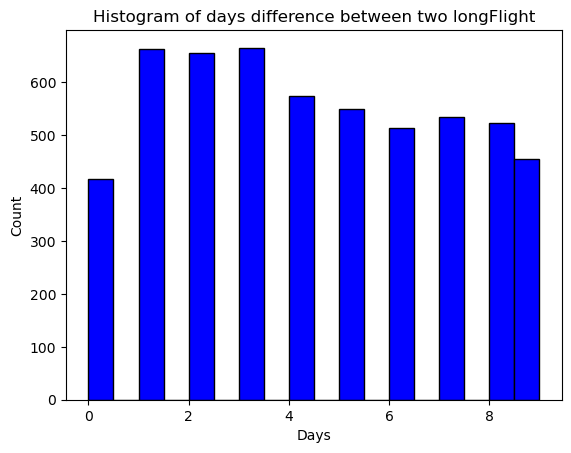

In [53]:
plt.hist(result['Days'], color = 'blue', edgecolor = 'black',bins = int(180/10))
plt.title('Histogram of days difference between two longFlight')
plt.xlabel('Days')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

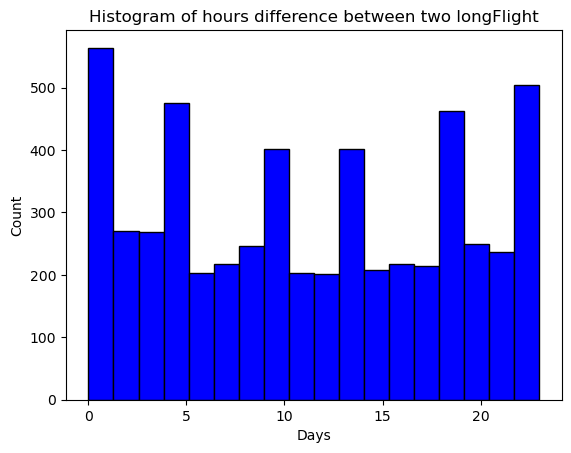

In [54]:
plt.hist(result['Hours'], color = 'blue', edgecolor = 'black',bins = int(180/10))
plt.title('Histogram of hours difference between two longFlight')
plt.xlabel('Days')
plt.ylabel('Count')

In [57]:
result = result[result['Days'] < 1]
result = result[result['Hours'] < 10]

In [58]:
result

,Name,MinTimeDifference,Days,Hours
110,ADELINA CHERNAIA,0 days 02:30:00,0,2
123,ADELINA FOMICHEVA,0 days 09:00:00,0,9
379,AGEEV RODION,0 days 06:45:00,0,6
971,ALESHIN GLEB,0 days 03:50:00,0,3
1085,ALIIA KORNEEVA,0 days 05:20:00,0,5
...,...,...,...,...
30461,ZAV'YALOV DAVID,0 days 07:35:00,0,7
30692,ZHURAVLEV STANISLAV,0 days 05:50:00,0,5
30820,ZLATA LAVROVA,0 days 08:05:00,0,8
31009,ZOTOV GERMAN,0 days 03:40:00,0,3


In [ ]:
result.to_csv('filtered_strange_person.csv', index_label='id')